Sampling für Posterior 1 in Kategorie bimodal


Multiprocess sampling (4 chains in 4 jobs)
Metropolis: [x]
Sampling 4 chains for 1_000 tune and 2_000 draw iterations (4_000 + 8_000 draws total) took 2 seconds.


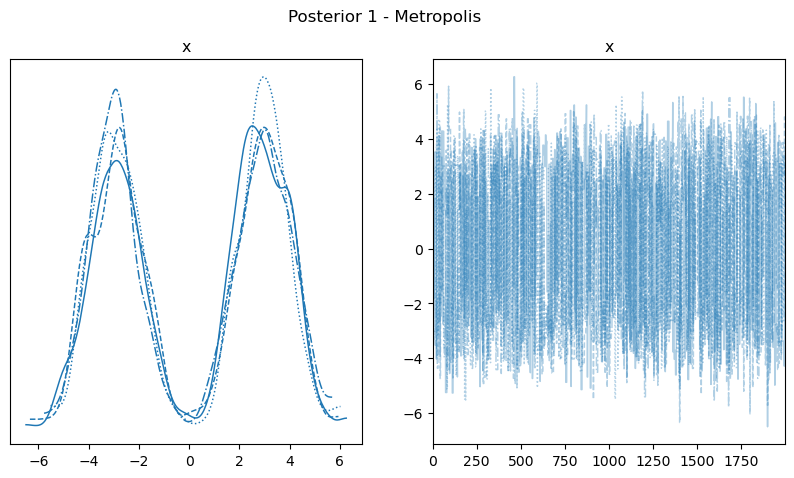

Population sampling (4 chains)
DEMetropolis: [x]
Attempting to parallelize chains to all cores. You can turn this off with `pm.sample(cores=1)`.
Sampling 4 chains for 1_000 tune and 2_000 draw iterations (4_000 + 8_000 draws total) took 5 seconds.
The rhat statistic is larger than 1.01 for some parameters. This indicates problems during sampling. See https://arxiv.org/abs/1903.08008 for details


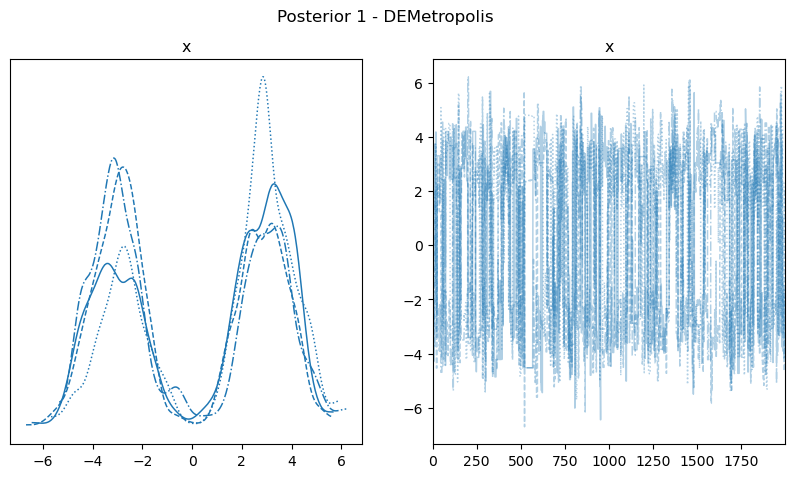

Multiprocess sampling (4 chains in 4 jobs)
NUTS: [x]
Sampling 4 chains for 1_000 tune and 2_000 draw iterations (4_000 + 8_000 draws total) took 3 seconds.
The rhat statistic is larger than 1.01 for some parameters. This indicates problems during sampling. See https://arxiv.org/abs/1903.08008 for details
The effective sample size per chain is smaller than 100 for some parameters.  A higher number is needed for reliable rhat and ess computation. See https://arxiv.org/abs/1903.08008 for details


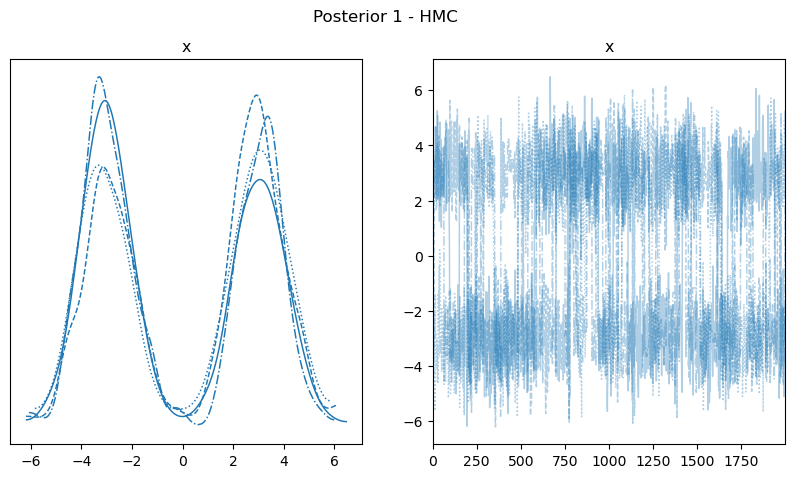

Initializing SMC sampler...
Sampling 6 chains in 6 jobs


/home/fabian/anaconda3/envs/pymc_immo_env/lib/python3.12/site-packages/arviz/data/base.py:265: UserWarning: More chains (6) than draws (3). Passed array should have shape (chains, draws, *shape)
  warnings.warn(


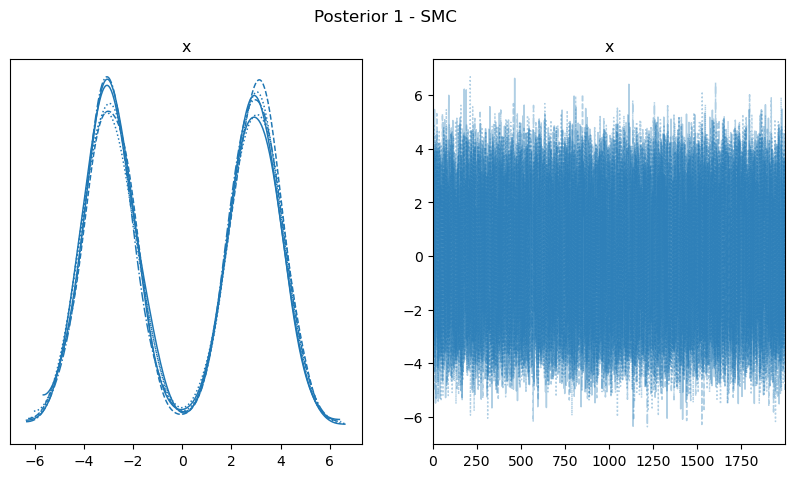

Sampling für Posterior 2 in Kategorie bimodal


Multiprocess sampling (4 chains in 4 jobs)
Metropolis: [x]
Sampling 4 chains for 1_000 tune and 2_000 draw iterations (4_000 + 8_000 draws total) took 2 seconds.


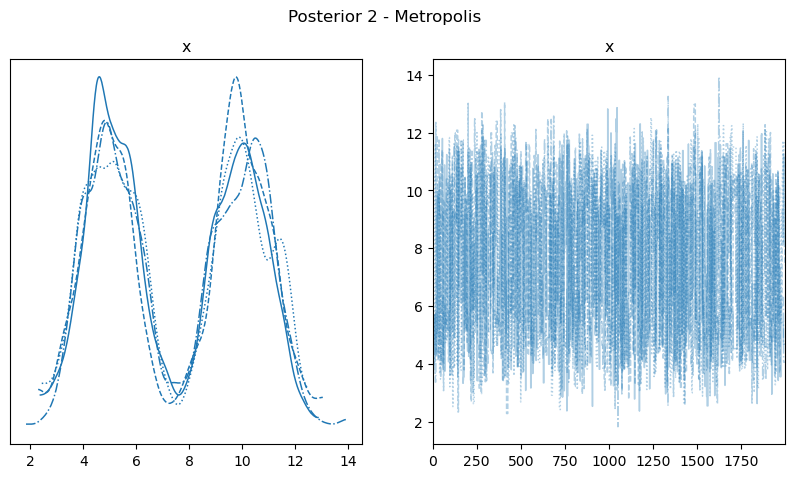

Population sampling (4 chains)
DEMetropolis: [x]
Attempting to parallelize chains to all cores. You can turn this off with `pm.sample(cores=1)`.
Sampling 4 chains for 1_000 tune and 2_000 draw iterations (4_000 + 8_000 draws total) took 5 seconds.


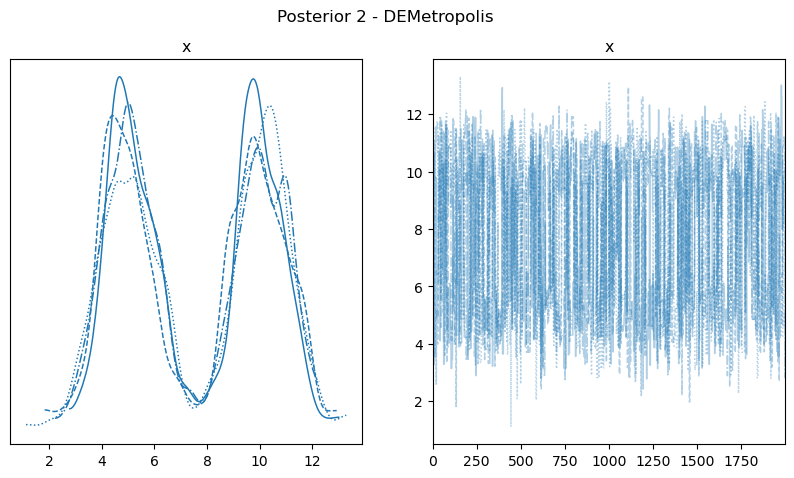

Multiprocess sampling (4 chains in 4 jobs)
NUTS: [x]
Sampling 4 chains for 1_000 tune and 2_000 draw iterations (4_000 + 8_000 draws total) took 3 seconds.
The rhat statistic is larger than 1.01 for some parameters. This indicates problems during sampling. See https://arxiv.org/abs/1903.08008 for details
The effective sample size per chain is smaller than 100 for some parameters.  A higher number is needed for reliable rhat and ess computation. See https://arxiv.org/abs/1903.08008 for details


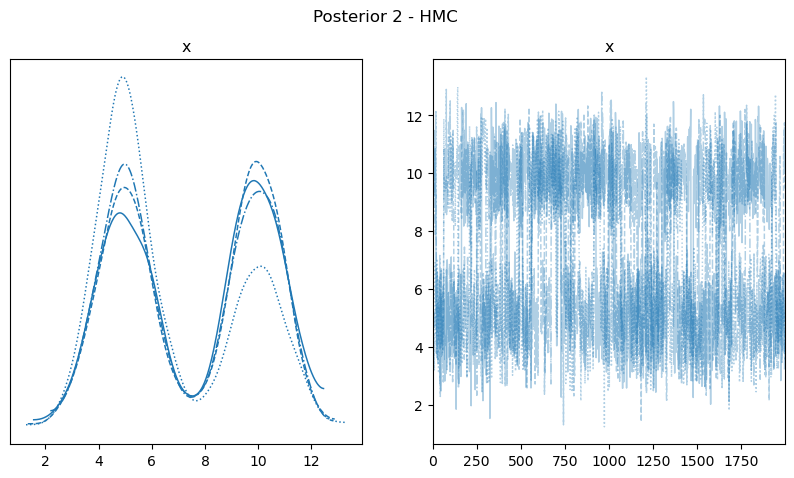

Initializing SMC sampler...
Sampling 6 chains in 6 jobs


/home/fabian/anaconda3/envs/pymc_immo_env/lib/python3.12/site-packages/arviz/data/base.py:265: UserWarning: More chains (6) than draws (3). Passed array should have shape (chains, draws, *shape)
  warnings.warn(


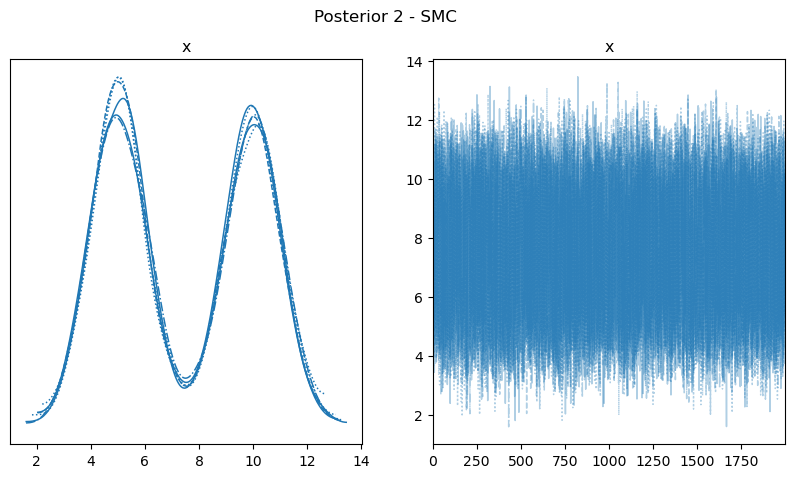

Diagnostik für Posterior_1:

Metropolis:
{'mean': {'x': 0.143}, 'sd': {'x': 3.14}, 'hdi_3%': {'x': -4.543}, 'hdi_97%': {'x': 4.435}, 'mcse_mean': {'x': 0.097}, 'mcse_sd': {'x': 0.069}, 'ess_bulk': {'x': 1081.0}, 'ess_tail': {'x': 1395.0}, 'r_hat': {'x': 1.0}}

DEMetropolis:
{'mean': {'x': 0.231}, 'sd': {'x': 3.197}, 'hdi_3%': {'x': -4.531}, 'hdi_97%': {'x': 4.657}, 'mcse_mean': {'x': 0.165}, 'mcse_sd': {'x': 0.117}, 'ess_bulk': {'x': 479.0}, 'ess_tail': {'x': 460.0}, 'r_hat': {'x': 1.02}}

HMC:
{'mean': {'x': 0.01}, 'sd': {'x': 3.211}, 'hdi_3%': {'x': -4.671}, 'hdi_97%': {'x': 4.485}, 'mcse_mean': {'x': 0.379}, 'mcse_sd': {'x': 0.269}, 'ess_bulk': {'x': 101.0}, 'ess_tail': {'x': 1163.0}, 'r_hat': {'x': 1.02}}

SMC:
{'mean': {'x': -0.014}, 'sd': {'x': 3.155}, 'hdi_3%': {'x': -4.623}, 'hdi_97%': {'x': 4.466}, 'mcse_mean': {'x': 0.029}, 'mcse_sd': {'x': 0.021}, 'ess_bulk': {'x': 11754.0}, 'ess_tail': {'x': 11772.0}, 'r_hat': {'x': 1.0}}
Diagnostik für Posterior_2:

Metropolis:
{'mean': {'

In [2]:
import pymc as pm
import numpy as np
import arviz as az
import matplotlib.pyplot as plt

# Framework for different categories of posteriors
class PosteriorFramework:
    def __init__(self):
        self.categories = {
            "unimodal": self._unimodal_posteriors,
            "bimodal": self._bimodal_posteriors,
            "symmetric": self._symmetric_posteriors,
            "asymmetric": self._asymmetric_posteriors
        }

    def _unimodal_posteriors(self):
        def posterior_1():
            with pm.Model() as model:
                x = pm.Normal("x", mu=0, sigma=1, initval=0)
                pm.Potential("likelihood", pm.logp(pm.Normal.dist(mu=0, sigma=1), x))
            return model

        def posterior_2():
            with pm.Model() as model:
                x = pm.Normal("x", mu=5, sigma=1, initval=5)
                pm.Potential("likelihood", pm.logp(pm.Normal.dist(mu=5, sigma=1), x))
            return model

        return [posterior_1, posterior_2]

    def _bimodal_posteriors(self):
        def posterior_1():
            with pm.Model() as model:
                x = pm.Uniform("x", lower=-20, upper=20)  # Uniform prior to define domain
                pm.Potential("bimodal", np.log(np.exp(-0.5 * (x - 3) ** 2) + np.exp(-0.5 * (x + 3) ** 2)))
            return model

        def posterior_2():
            with pm.Model() as model:
                x = pm.Uniform("x", lower=-20, upper=20)  # Uniform prior to define domain
                pm.Potential("bimodal", np.log(np.exp(-0.5 * (x - 5) ** 2) + np.exp(-0.5 * (x - 10) ** 2)))
            return model

        return [posterior_1, posterior_2]

    def _symmetric_posteriors(self):
        def posterior_1():
            with pm.Model() as model:
                x = pm.StudentT("x", nu=5, mu=0, sigma=2, initval=0)
                pm.Potential("likelihood", pm.logp(pm.StudentT.dist(nu=5, mu=0, sigma=2), x))
            return model

        def posterior_2():
            with pm.Model() as model:
                x = pm.Normal("x", mu=0, sigma=3, initval=0)
                pm.Potential("likelihood", pm.logp(pm.Normal.dist(mu=0, sigma=3), x))
            return model

        return [posterior_1, posterior_2]

    def _asymmetric_posteriors(self):
        def posterior_1():
            with pm.Model() as model:
                x = pm.Gamma("x", alpha=2, beta=1, initval=1.0)
                pm.Potential("likelihood", pm.logp(pm.Gamma.dist(alpha=2, beta=1), x))
            return model

        def posterior_2():
            with pm.Model() as model:
                x = pm.Exponential("x", lam=1, initval=1.0)
                pm.Potential("likelihood", pm.logp(pm.Exponential.dist(lam=1), x))
            return model

        return [posterior_1, posterior_2]

    def run_sampling(self, category):
        if category not in self.categories:
            raise ValueError("Kategorie nicht gefunden. Verfügbare Kategorien: unimodal, bimodal, symmetric, asymmetric")

        posteriors = self.categories[category]()
        diagnostics = {}

        for i, posterior in enumerate(posteriors):
            model = posterior()
            with model:
                print(f"Sampling für Posterior {i+1} in Kategorie {category}")

                methods = {
                    "Metropolis": pm.Metropolis(),
                    "DEMetropolis": pm.DEMetropolis(),
                    "HMC": pm.NUTS(),
                    "SMC": "smc"
                }

                traces = {}
                for method_name, sampler in methods.items():
                    if method_name == "SMC":
                        trace = pm.sample_smc(draws=2000, return_inferencedata=True, progressbar=False)
                    else:
                        trace = pm.sample(2000, tune=1000, step=sampler, return_inferencedata=True, progressbar=False)
                    traces[method_name] = trace
                    az.plot_trace(trace, figsize=(10, 5))
                    plt.suptitle(f"Posterior {i+1} - {method_name}")
                    plt.show()

                diagnostics[f"Posterior_{i+1}"] = {
                    method_name: az.summary(trace).to_dict() for method_name, trace in traces.items()
                }

        return diagnostics

# instantiate framework
framework = PosteriorFramework()

# Choose category
category = "bimodal"  # Other options: unimodal, symmetric, asymmetric
diagnostics = framework.run_sampling(category)

# Comparison of diagnostics
for posterior, methods in diagnostics.items():
    print(f"Diagnostik für {posterior}:")
    for method, diag in methods.items():
        print(f"\n{method}:\n{diag}")
